# Career Choice based on 2011-2017 employment data

With great development of Internet and technologies, the job market has dramatically varied in recent several years. A new version of industries and occupations development in last decades is necessary for almost everyone in the society. The employment market is such a complicate system that it could relate many aspects, to such as the development of the country, the states and the city, the technology improvement in crucial areas and even the change of the public flavor. However, as direct consequences of the industry development, the salary level and the number of employees in certain field could reflect the change of the employment market. By analyzing the employment data, we're able to learn the development of each states and each fields, which could possiblly be used for further analysis such as presidential election.
The Bureau of Labor Statistics reveal the employment occupytion statistics every year. The data inculdes 53 large categories and thousands of small categories from all over the United States. This precious data inculdes the number and average income of employees in each catergories and the detailed information of the industries that they are working in. Our project would like to learn the state-wised and category-wised job market data to conclude solid and useful job guidance.

In [1]:
# import necessary libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# # Load the employment data from the Bureau of labor statistics
# data2011 = pd.read_excel(open('oes_data_2011.xlsx','rb'), sheet_name='oes_data_2011')
# data2012 = pd.read_excel(open('all_oes_data_2012.xlsx','rb'), sheet_name='OES Data May 2012')
# data2013 = pd.read_excel(open('oes_data_2013.xlsx','rb'), sheet_name='All May 2013 OES Data')
# data2014 = pd.read_excel(open('all_data_M_2014.xlsx','rb'), sheet_name='All May 2014 Data')
# data2015 = pd.read_excel(open('all_data_M_2015.xlsx','rb'), sheet_name='All May 2015 Data')
# data2016 = pd.read_excel(open('all_data_M_2016.xlsx','rb'), sheet_name='All May 2016 Data')
# data2017 = pd.read_excel(open('all_data_M_2017.xlsx','rb'), sheet_name='All May 2017 Data')

# pd.set_option('display.max_columns', 500)
# data2011.columns = map(str.lower, data2011.columns)

In [3]:
data2011 = pd.read_csv('data2011.csv')
data2012 = pd.read_csv('data2012.csv')
data2013 = pd.read_csv('data2013.csv')
data2014 = pd.read_csv('data2014.csv')
data2015 = pd.read_csv('data2015.csv')
data2016 = pd.read_csv('data2016.csv')
data2017 = pd.read_csv('data2017.csv')

pd.set_option('display.max_columns', 500)
data2011.columns = map(str.lower, data2011.columns)

C:\Users\linsh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Drop unused data content to save memory
dfs = [data2011,data2012,data2013,data2014,data2015,data2016,data2017]
for df in dfs:
    df = df[(df['group']=='major')|(df['group']=='tatal')]

In [5]:
# divide the employment data for each year to country level and state level for future analysis
us2011 = data2011[data2011['area_type']==1]
state2011 = data2011[data2011['area_type']==2]
del data2011
us2012 = data2012[data2012['area_type']==1]
state2012 = data2012[data2012['area_type']==2]
del data2012
us2013 = data2013[data2013['area_type']==1]
state2013 = data2013[data2013['area_type']==2]
del data2013
us2014 = data2014[data2014['area_type']==1]
state2014 = data2014[data2014['area_type']==2]
del data2014
us2015 = data2015[data2015['area_type']==1]
state2015 = data2015[data2015['area_type']==2]
del data2015
us2016 = data2016[data2016['area_type']==1]
state2016 = data2016[data2016['area_type']==2]
del data2016
us2017 = data2017[data2017['area_type']==1]
state2017 = data2017[data2017['area_type']==2]
del data2017

In [6]:
# Generate the overall statistic of each states
total2011 = state2011[state2011['group']=='total']
total2012 = state2012[state2012['group']=='total']
total2013 = state2013[state2013['group']=='total']
total2014 = state2014[state2014['group']=='total']
total2015 = state2015[state2015['group']=='total']
total2016 = state2016[state2016['group']=='total']
total2017 = state2017[state2017['group']=='total']

In [7]:
# Clean and basic process the overall state data, join the mean and median of annual income from each year to the same dataset
total = [total2011,total2012,total2013,total2014,total2015,total2016,total2017]
total = [df.set_index('area') for df in total]
join_list = ['a_mean','a_median']
y = ['2011','2012','2013','2014','2015','2016','2017']
annual_m = total[0][['area_title','a_mean','a_median']]
for i in range(1,len(total)):
    annual_m = annual_m.join(total[i][join_list],lsuffix=y[i-1], rsuffix=y[i])
annual_m.rename(columns={'a_mean':'a_mean2017','a_median':'a_median2017'},inplace=True)

In [8]:
# Extract the list of mean and median in each state during 2011-2017 and fit a linear regression on the data to get the increase
# rate of the mean and median in each state
c_mean = annual_m.columns[[c[:6]=='a_mean' for c in annual_m.columns]]
c_median = annual_m.columns[[c[:8]=='a_median' for c in annual_m.columns]]
annual_m[c_mean] = annual_m[c_mean].apply(pd.to_numeric)
annual_m[c_median] = annual_m[c_median].apply(pd.to_numeric)
annual_m['mean'] = annual_m[c_mean].values.tolist()
annual_m['median'] = annual_m[c_median].values.tolist()

from scipy.stats import linregress
def slope(v):
    y = range(2011,2018)
    lr = linregress(y,v)
    return lr.slope

annual_m['mean_slope'] = annual_m['mean'].apply(slope)
annual_m['median_slope'] = annual_m['median'].apply(slope)
annual_m

,area_title,a_mean2011,a_median2011,a_mean2012,a_median2012,a_mean2013,a_median2013,a_mean2014,a_median2014,a_mean2015,a_median2015,a_mean2016,a_median2016,a_mean2017,a_median2017,mean,median,mean_slope,median_slope
area,,,,,,,,,,,,,,,,,,,
1,Alabama,39180,29850,39550,29950,40240,30390,40890,30850,41920,31550,42510,32100,43170,32800,"[39180, 39550, 40240, 40890, 41920, 42510, 43170]","[29850, 29950, 30390, 30850, 31550, 32100, 32800]",698.928571,511.071429
2,Alaska,51590,42960,52050,43510,53110,44350,54040,45200,55760,46420,56710,47170,57750,47560,"[51590, 52050, 53110, 54040, 55760, 56710, 57750]","[42960, 43510, 44350, 45200, 46420, 47170, 47560]",1087.500000,828.214286
4,Arizona,43670,34110,43950,33980,44370,34170,44580,34230,45310,34680,46290,35470,48160,36270,"[43670, 43950, 44370, 44580, 45310, 46290, 48160]","[34110, 33980, 34170, 34230, 34680, 35470, 36270]",681.785714,356.071429
5,Arkansas,36340,28460,36850,28690,37340,28910,37940,29140,38540,29420,39590,30130,40530,30810,"[36340, 36850, 37340, 37940, 38540, 39590, 40530]","[28460, 28690, 28910, 29140, 29420, 30130, 30810]",687.500000,372.857143
6,California,51910,38530,52350,38770,53030,38920,53890,39190,55260,39830,56840,40920,57190,40980,"[51910, 52350, 53030, 53890, 55260, 56840, 57190]","[38530, 38770, 38920, 39190, 39830, 40920, 40980]",966.071429,448.571429
8,Colorado,47510,37070,48110,37100,48950,37530,49860,38020,51180,38800,52710,39710,54050,40880,"[47510, 48110, 48950, 49860, 51180, 52710, 54050]","[37070, 37100, 37530, 38020, 38800, 39710, 40880]",1108.928571,640.000000
9,Connecticut,52830,41320,53760,42030,54410,42280,55060,42990,56280,43830,57960,45090,59410,45870,"[52830, 53760, 54410, 55060, 56280, 57960, 59410]","[41320, 42030, 42280, 42990, 43830, 45090, 45870]",1071.785714,761.428571
10,Delaware,47420,36180,48350,36710,49260,37320,49520,37490,50300,37750,50930,37960,52200,38850,"[47420, 48350, 49260, 49520, 50300, 50930, 52200]","[36180, 36710, 37320, 37490, 37750, 37960, 38850]",733.571429,390.714286
11,District of Columbia,74540,61180,75950,61960,77040,63680,78580,64890,80150,66040,82950,67870,85720,70340,"[74540, 75950, 77040, 78580, 80150, 82950, 85720]","[61180, 61960, 63680, 64890, 66040, 67870, 70340]",1808.928571,1487.857143


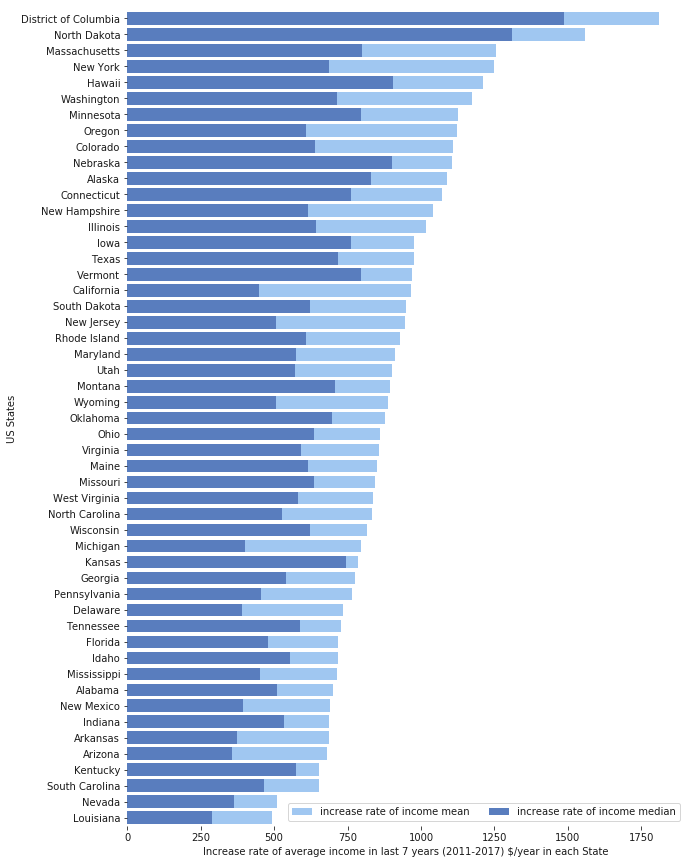

In [9]:
# Plot the increase rate of the mean and median of each state during 2011-2017


figure, ax = plt.subplots(figsize=(10,15))

pic_data = annual_m[['area_title','mean_slope','median_slope']].sort_values('mean_slope',ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="mean_slope", y="area_title", data=pic_data,label="increase rate of income mean", color="b")

sns.set_color_codes("muted")
sns.barplot(x="median_slope", y="area_title", data=pic_data,label="increase rate of income median",color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="US States", xlabel="Increase rate of average income in last 7 years (2011-2017) $/year in each State")
sns.despine(left=True, bottom=True)

The graph above is the increase rate of the mean and median in all the states in U.S.. Consider the fact that the property distribution in U.S. society that few people possess a huge amount of the properties. The mean income level is alway higher tha the median income. The fact that all the increase rate of income mean in the graph is higher than the increase rate of income median indicates that we are experiencing a even more rich-poor divide. However, different states have different conditions. The states such as Kansas, Kentuchy and North Dakota have closed increase rate which means the divide is getting large slower in these states. The states such as California and Arizona are accelerating divded. Considering the overall rank of the increasing rate, North Dakota government did a good job during 2011-2017 that the state reach high increase rate with low divding speed whic Lousiana government did a poor job that the increase rate is low and the divide spped is large.

In [10]:
# Process and join the country employment data during 2011 and 2017. The data is grouped by the 53 large occupation catergories
# to analyze the income change of each category from 2011 to 2017
major2011 = us2011[us2011['group']=='major']
major2012 = us2012[us2012['group']=='major']
major2013 = us2013[us2013['group']=='major']
major2014 = us2014[us2014['group']=='major']
major2015 = us2015[us2015['group']=='major']
major2016 = us2016[us2016['group']=='major']
major2017 = us2017[us2017['group']=='major']
major2014.rename(columns={'occ code':'occ_code','occ title':'occ_title'},inplace=True)
major2015.rename(columns={'occ code':'occ_code','occ title':'occ_title'},inplace=True)
major2016.rename(columns={'occ code':'occ_code','occ title':'occ_title'},inplace=True)


majors = [major2011,major2012,major2013,major2014,major2015,major2016,major2017]
majors_gp = []
num_list = ['tot_emp','a_mean']
for major in majors:
    major[num_list] = major[num_list].apply(lambda x:pd.to_numeric(x,errors='coerce'))
    majors_gp.append(major.groupby('occ_code').agg({'occ_title':lambda x:x.value_counts().index[0],'tot_emp':np.sum,'a_mean':np.mean}))

y = ['2011','2012','2013','2014','2015','2016','2017']
major_info = majors_gp[0]
for i in range(1,len(majors_gp)):
    major_info = major_info.join(majors_gp[i][num_list],lsuffix=y[i-1], rsuffix=y[i])
major_info.rename(columns={'a_mean':'a_mean2017','tot_emp':'tot_emp2017'},inplace=True)

C:\Users\linsh\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\linsh\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [11]:
# Fit linear regression and calculate the increase rate (slope) of number of employees and mean of income in each catergory
oc_mean = major_info.columns[[c[:6]=='a_mean' for c in major_info.columns]]
oc_emp = major_info.columns[[c[:7]=='tot_emp' for c in major_info.columns]]
major_info['mean'] = major_info[oc_mean].values.tolist()
major_info['emp'] = major_info[oc_emp].values.tolist()

major_info['mean_slope'] = major_info['mean'].apply(slope)
major_info['emp_slope'] = major_info['emp'].apply(slope)
major_info

,occ_title,tot_emp2011,a_mean2011,tot_emp2012,a_mean2012,tot_emp2013,a_mean2013,tot_emp2014,a_mean2014,tot_emp2015,a_mean2015,tot_emp2016,a_mean2016,tot_emp2017,a_mean2017,mean,emp,mean_slope,emp_slope
occ_code,,,,,,,,,,,,,,,,,,,
11-0000,Management Occupations,34174040.0,106187.006110,35337790.0,107045.512295,36158370.0,108697.268994,37209320.0,110186.242300,38247740.0,112419.758551,39138830.0,115200.581162,40137070.0,116174.461538,"[106187.00610997963, 107045.51229508196, 10869...","[34174040.0, 35337790.0, 36158370.0, 37209320....",1785.535485,9.850193e+05
13-0000,Business and Financial Operations Occupations,33610250.0,62678.319502,34846390.0,63185.462012,36098920.0,64128.480493,36984620.0,65358.957055,38262620.0,66668.719512,39620480.0,67477.891566,40644110.0,68173.245614,"[62678.319502074686, 63185.46201232033, 64128....","[33610250.0, 34846390.0, 36098920.0, 36984620....",986.067017,1.171909e+06
15-0000,Computer and Mathematical Occupations,18250980.0,66794.063830,19123580.0,68177.440860,19726170.0,69648.639309,20436480.0,71077.094017,21481550.0,72991.794872,22328540.0,74192.869198,22808120.0,75752.102804,"[66794.06382978724, 68177.44086021505, 69648.6...","[18250980.0, 19123580.0, 19726170.0, 20436480....",1508.861756,7.798829e+05
17-0000,Architecture and Engineering Occupations,12516410.0,73025.132979,12757830.0,74594.641910,12880190.0,75919.455041,13081670.0,77359.148936,13459540.0,79319.561856,13590940.0,80794.396985,13679150.0,82187.547684,"[73025.1329787234, 74594.64190981432, 75919.45...","[12516410.0, 12757830.0, 12880190.0, 13081670....",1545.959324,2.047782e+05
19-0000,"Life, Physical, and Social Science Occupations",6530470.0,66506.020067,6658710.0,66136.828479,6837390.0,67043.452769,6895360.0,68220.761905,6923810.0,69372.460568,6964990.0,71787.961783,6930670.0,72656.915254,"[66506.02006688963, 66136.8284789644, 67043.45...","[6530470.0, 6658710.0, 6837390.0, 6895360.0, 6...",1145.855713,6.784214e+04
21-0000,Community and Social Service Occupations,11343220.0,45473.734940,11287880.0,46354.171779,11434120.0,46379.096386,11604210.0,47265.764706,11850390.0,48090.240964,12135520.0,49314.476744,12603130.0,50588.670520,"[45473.73493975904, 46354.17177914111, 46379.0...","[11343220.0, 11287880.0, 11434120.0, 11604210....",820.591473,2.104029e+05
23-0000,Legal Occupations,5310960.0,112698.648649,5402380.0,114642.131783,5519280.0,118644.534884,5578170.0,120068.125000,5639310.0,121424.686347,5706360.0,123639.574468,5812160.0,127199.227941,"[112698.64864864865, 114642.13178294574, 11864...","[5310960.0, 5402380.0, 5519280.0, 5578170.0, 5...",2295.599097,7.969964e+04
25-0000,"Education, Training, and Library Occupations",63602140.0,48568.288288,63124220.0,50321.911111,63287550.0,51660.720339,63717070.0,52644.212766,64463970.0,53061.666667,65119150.0,54027.792208,65730410.0,55123.375000,"[48568.28828828829, 50321.91111111111, 51660.7...","[63602140.0, 63124220.0, 63287550.0, 63717070....",1017.070309,4.125389e+05
27-0000,"Arts, Design, Entertainment, Sports, and Media...",9671300.0,50997.711670,9788110.0,51096.498856,9817420.0,52009.796380,9983620.0,53102.154195,10282010.0,54414.298441,10587300.0,55436.547085,10691590.0,56186.327543,"[50997.71167048055, 51096.49885583524, 52009.7...","[9671300.0, 9788110.0, 9817420.0, 9983620.0, 1...",951.801648,1.829943e+05


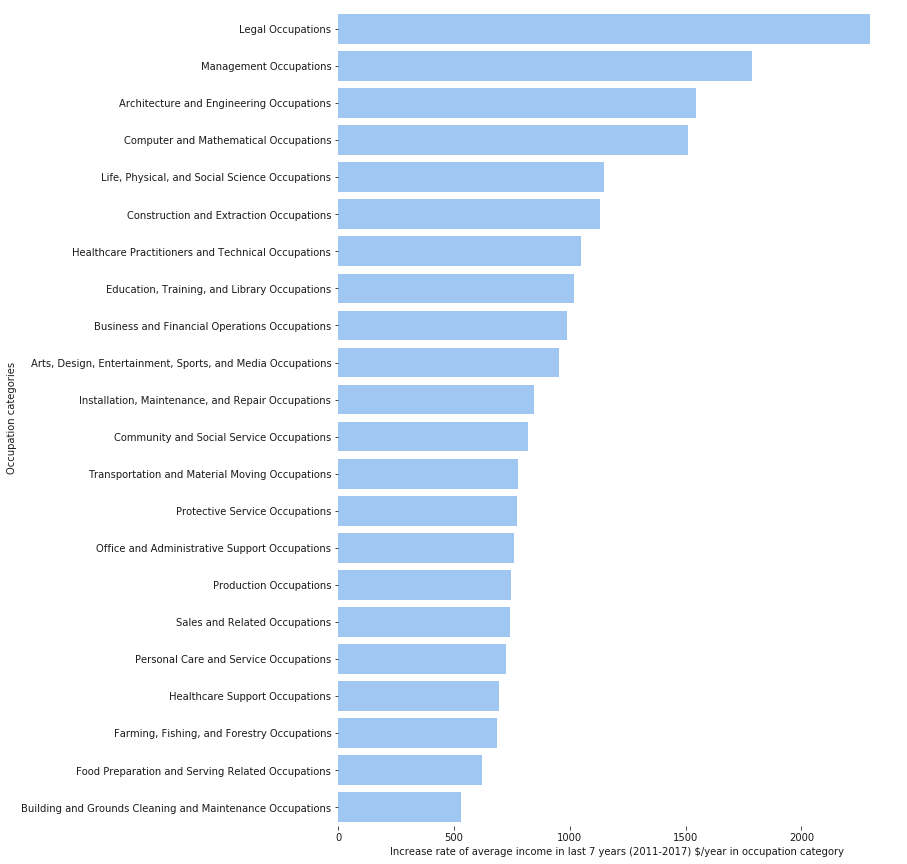

In [12]:
# Sorted and plot the increase rate of income mean of each category from 2011 to 2017
figure, ax = plt.subplots(figsize=(10,15))

pic_data = major_info[['occ_title','mean_slope','emp_slope']].sort_values('mean_slope',ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="mean_slope", y="occ_title", data=pic_data,label="increase rate of income mean", color="b")

# ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Occupation categories", xlabel="Increase rate of average income in last 7 years (2011-2017) $/year in occupation category")
sns.despine(left=True, bottom=True)

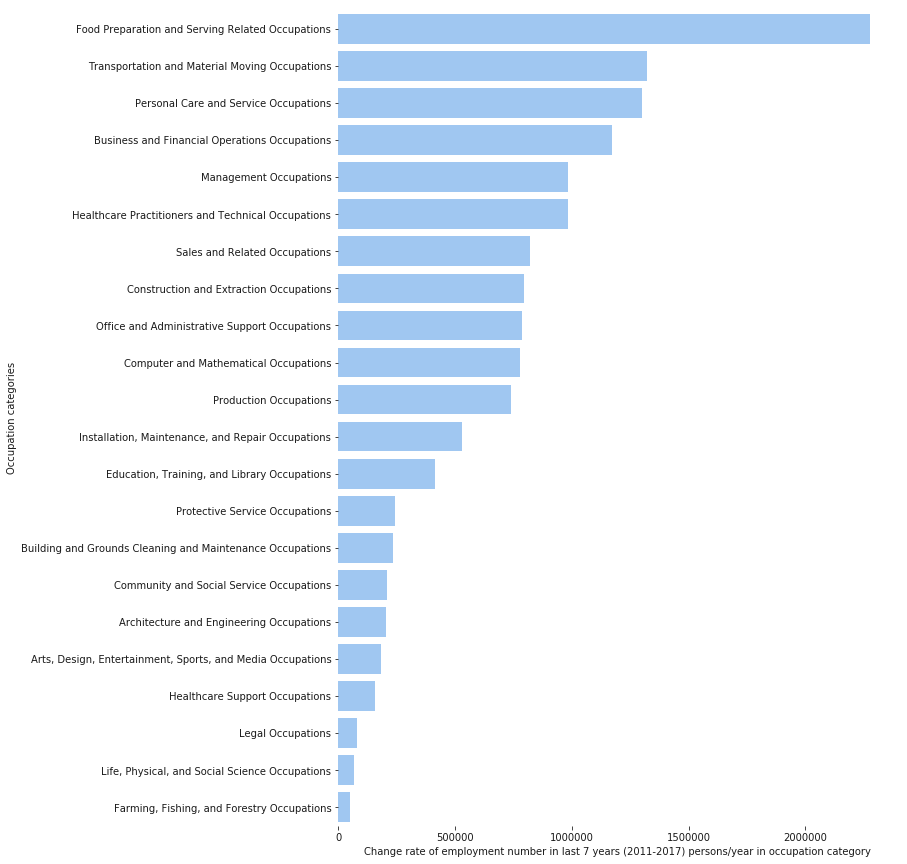

In [13]:
# Sorted and plot the increase rate of number of employment of each category from 2011 to 2017
figure, ax = plt.subplots(figsize=(10,15))

pic_data = major_info[['occ_title','mean_slope','emp_slope']].sort_values('emp_slope',ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="emp_slope", y="occ_title", data=pic_data,label="increase rate of income mean", color="b")

# ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Occupation categories", xlabel="Change rate of employment number in last 7 years (2011-2017) persons/year in occupation category")
sns.despine(left=True, bottom=True)

The two graphs indicate the jobs such as managment occupations, Healthcare occupations and financial occupations have increasing available positions and promising income increase speed recently. The occupations that generally require high educations like legal occupations and architecture occupations almost the fastest income increasement but have few available positions. The Computer and mathmatic occupations is also a high-educated job but it has much more available positions than other high-educated catergories. Therefore, we can conclude that the Computer and Mathematical occupations are 'hot' field in last decade.